# Data Visualization
importing the needed libraries:

In [15]:
# Importing the needed modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Loading the dataset:

In [16]:
df = pd.read_csv('Indicators.csv')
df.shape

(5656458, 6)

In [17]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Checking the shape of the dataset:

In [18]:
# Unique Countries in the dataset:
countries = df['CountryName'].unique().tolist()
country_code = df['CountryCode'].unique().tolist()

# Check if we have equal number of countries as country_code:
print("Same number of countries as country_code: ", len(countries) == len(country_code))

# Checking the total types of indicators:
indicators = df['IndicatorName'].unique().tolist()
print("Number of indicators: ", len(indicators))

# Range of years in the dataset:
years = df['Year'].unique().tolist()
print('Years range from', min(years), 'to', max(years), 'a total of', len(years), 'years')

Same number of countries as country_code:  True
Number of indicators:  1344
Years range from 1960 to 2015 a total of 56 years


### Basic Plotting using `matplotlib`
Lets pick a country and an indicator to explore. We choose that to be *USA* and $CO^2$ *emissions per capita*

In [19]:
hist_country, hist_indicator = 'USA', 'CO2 emissions \(metric'

mask1 = df['CountryCode'] == hist_country
mask2 = df['IndicatorName'].str.contains(hist_indicator)

filtered_USA = df[mask1 & mask2]

filtered_USA.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119
166672,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,17.451725
198040,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,18.121073
230758,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,18.598318
263313,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,19.089389
296298,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,19.857946


### Bar chart

In [24]:
## Extracting the years and values from the dataset:
years = filtered_USA['Year'].values             # .values converts the series to array format
co2 = filtered_USA['Value'].values              # .values converts the series to array format

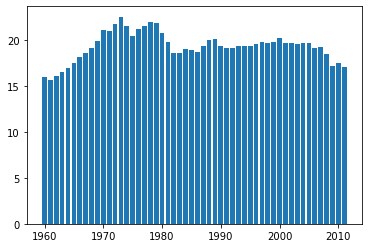

In [25]:
plt.bar(years, co2)
plt.show()

### Line Plot

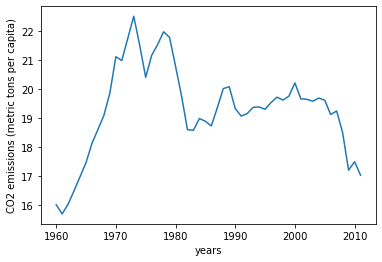

In [28]:
plt.plot(years, co2)
plt.xlabel("years")
plt.ylabel(filtered_USA['IndicatorName'].iloc[0])
plt.show()

Fixing the axis:

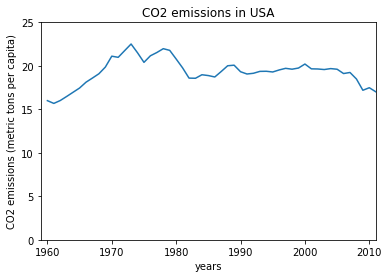

In [33]:
############################################
# Same code as before:
plt.plot(years, co2)
plt.xlabel("years")
plt.ylabel(filtered_USA['IndicatorName'].iloc[0])
############################################
# Adding the title to the plot:
plt.title('CO2 emissions in USA')

# Scaling the axis to start from zero:
plt.axis(
    [
        1959,   # starting year for the x-axis
        2011,   # ending year for the x-axis
        0,      # starting year for the y-axis
        25       # ending year for the y-axis
    ]
);



### Using the histogram to visualize the the distribution

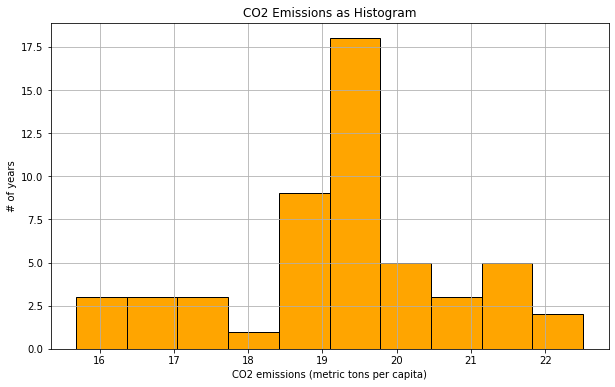

In [72]:
hist_data = filtered_USA['Value'].values
plt.figure(figsize=(10,6))
plt.hist(hist_data, 10, density= False, edgecolor = 'black', facecolor = 'orange');
plt.grid(True)
plt.xlabel(filtered_USA['IndicatorName'].iloc[0])
plt.ylabel('# of years');
plt.title('CO2 Emissions as Histogram');

#### Comparison of the CO2 emissions to the other countries:

In [86]:
# Same mask as before for the CO2 emission:
co2_indicator = hist_indicator
year_indicator = 2011               # we seek values for comparison for 2011
                                    # needed the list for the year indicator

mask1 = df['IndicatorName'].str.contains(co2_indicator)
mask2 = df['Year'].isin([year_indicator]) 

co2_2011 = df[mask1 & mask2]        # this includes the CO2 emissions from the US too.
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


### Plotting the comparison

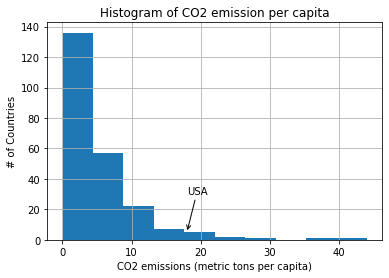

In [101]:
# Lets plot histogram indicating the CO2 emission per country.

fig, ax = plt.subplots()        # returns plots separate then axes

ax.annotate(
    "USA", 
    xy = (18,5), xycoords = 'data',
    xytext = (18,30), textcoords = 'data',
    arrowprops = {'arrowstyle': "->", 'connectionstyle': "arc3"}
)

plt.hist(
    co2_2011['Value'],
    bins = 10,
    density = False,
)

plt.xlabel(filtered_USA['IndicatorName'].iloc[0])
plt.ylabel("# of Countries")
plt.title("Histogram of CO2 emission per capita")
plt.grid(True)
plt.show()


### Relationship between CO2 emissions and GDP
Lets pull up the GDP data for USA

In [108]:
hist_indicator = "GDP per capita \(constant 2005"
hist_country = "USA"

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_usa = data[mask1 & mask2]

gdp_usa.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


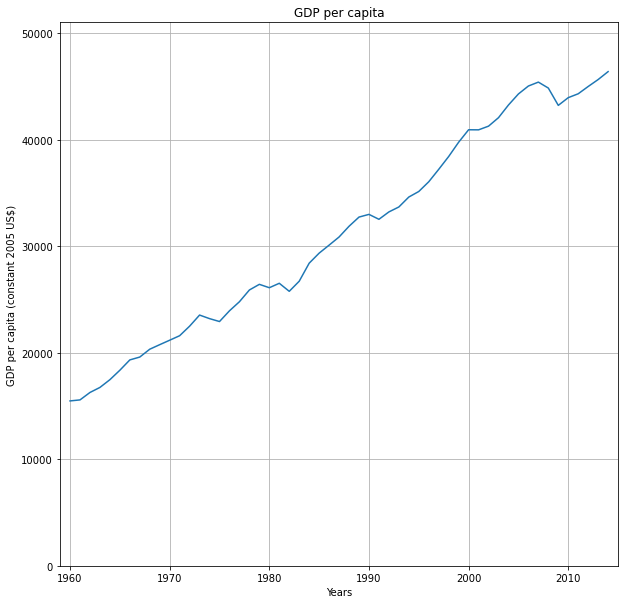

In [124]:
# Plotting the trend of GDP per capita
year_indicator, gdp = gdp_usa['Year'].values, gdp_usa['Value'].values

# Setting up the line chart
plt.figure(figsize = (10,10));
plt.plot(year_indicator, gdp)
plt.xlabel('Years')
plt.ylabel(gdp_usa['IndicatorName'].iloc[0]);
plt.title('GDP per capita')

# Fixing the axis:
plt.axis([1959, 2015, 0, 1.1 * max(gdp)])
plt.grid(True)
plt.show()

Now to show the trends via scatterplot, we need to ensure that the timeframe is the same.

In [128]:
print("Emissions starts from", min(years), "and ends at", max(years))
print("GDP's data starts from", min(gdp_usa['Year']), "and ends at", max(gdp_usa['Year']))

Emissions starts from 1960 and ends at 2011
GDP's data starts from 1960 and ends at 2014


In [132]:
# Since the GDP's timeframe is greater than CO2 emissions timeframe, we trim the GDP's timeframe
gdp_usa = gdp_usa[gdp_usa['Year']<2012]
print("GDP's timeframe", min(gdp_usa['Year']), 'to', max(gdp_usa['Year']))
print("Emissons timeframe", min(years), 'to', max(years))

GDP's timeframe 1960 to 2011
Emissons timeframe 1960 to 2011


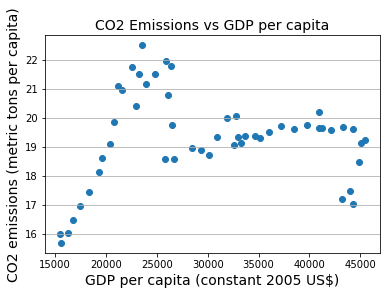

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

# figure and axes for plotting
fig, ax = plt.subplots()
# Grid lines, Xticks, xlabels, ylabels

ax.yaxis.grid(True)
ax.set_title("CO2 Emissions vs GDP per capita", fontsize = 14)
ax.set_ylabel(filtered_USA['IndicatorName'].iloc[0], fontsize = 14)
ax.set_xlabel(gdp_usa['IndicatorName'].iloc[0], fontsize = 14)

X = gdp_usa['Value']
Y = filtered_USA['Value']

ax.scatter(X,Y)
plt.show()

In [135]:
## The plot above shows weak/no correlations between the two variables. 
# We can verify that from computing the correlation between the two variables.

np.corrcoef(X,Y)

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

A correlation of $7\%$ shows that there is no linear relationship between the two. Hence increasing CO2 emissions per capita is not going to increase the GDP per capita.